## Import modules and functions

In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc

import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio

## Define directory of images

In [2]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed culture/Controls/201912_tnrs_arent_preexisting_epitopes' #master folder

## Make dictionary for storing results

In [3]:
results = {"filename":[],"exp":[],"coverslip":[],
           "Manual mask from matlab GUI":[],"bg sub int under mask":[]}
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if "analyse" in str(filelist[i]):
        if "gm6" in str(filelist[i]):
            if ("backup" in str(filelist[i]))==False:
                if ("ignore" in str(filelist[i]))==False:
                    if ("dditional" in str(filelist[i]))==False:
                        if filelist[i].endswith(".nd2"): 
                            results["filename"].append(filelist[i])
                            results["coverslip"].append(filelist[i].split('/')[-2])
                            results["exp"].append(filelist[i].split('/')[-4])

## Read manual masks from Matlab GUI

In [4]:
## matlab files
for im in range(0,len(results["filename"])): 
    file=results["filename"][im][:-4]+'_dendritesmask.mat'
    from pathlib import Path
    my_file = Path(file)
    if my_file.exists():
        print(file)
        mat = spio.loadmat(file, squeeze_me=True)
        mask=mat['totMask']>0.99
        results["Manual mask from matlab GUI"].append(mask)
    else:
        results["Manual mask from matlab GUI"].append(np.nan)
clear_output()        
print("Done!")

Done!


## Batch analysis of images - mean intensity

In [5]:
print('Total number of images: ' + str(len(results['filename'])))

for i in range(0,len(results["filename"])): 
    flag=False
    print('Calculating image no ' + str(i+1) + ' out of' + str(len(results["filename"])))
    #read the image
    with ND2Reader(results["filename"][i]) as images:
        ecm_image=images[0]
    #convert to numpy array - a format easier to manipunuclei with code
    ecm_image=ecm_image.astype(np.int16)
    #read masks 
    matlab_mask=results["Manual mask from matlab GUI"][i]
    if type(matlab_mask)==np.ndarray:
        flag=True
    #image after background subtraction
    #for ecm image
    if flag==True:
        ecm_matlabmasked_bgreduced=deepcopy(ecm_image)
        bg_matlabmask=np.mean(ndi.median_filter(ecm_image[matlab_mask],size=5))+0*np.std(ndi.median_filter(ecm_image[matlab_mask],size=5))
        ecm_matlabmasked_bgreduced=np.subtract(ecm_matlabmasked_bgreduced,bg_matlabmask)
        ecm_matlabmasked_bgreduced[ecm_matlabmasked_bgreduced<0]=0
        ecm_matlabmasked_bgreduced[~matlab_mask]=0
        
    if flag==True:
        results["bg sub int under mask"].append(ecm_matlabmasked_bgreduced[matlab_mask].mean())
    else:
        results["bg sub int under mask"].append(np.nan)

Total number of images: 279
Calculating image no 1 out of279
Calculating image no 2 out of279
Calculating image no 3 out of279
Calculating image no 4 out of279
Calculating image no 5 out of279
Calculating image no 6 out of279
Calculating image no 7 out of279
Calculating image no 8 out of279
Calculating image no 9 out of279
Calculating image no 10 out of279
Calculating image no 11 out of279
Calculating image no 12 out of279
Calculating image no 13 out of279
Calculating image no 14 out of279
Calculating image no 15 out of279
Calculating image no 16 out of279
Calculating image no 17 out of279
Calculating image no 18 out of279
Calculating image no 19 out of279
Calculating image no 20 out of279
Calculating image no 21 out of279
Calculating image no 22 out of279
Calculating image no 23 out of279
Calculating image no 24 out of279
Calculating image no 25 out of279
Calculating image no 26 out of279
Calculating image no 27 out of279
Calculating image no 28 out of279
Calculating image no 29 out o

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encounter

Calculating image no 233 out of279
Calculating image no 234 out of279
Calculating image no 235 out of279
Calculating image no 236 out of279
Calculating image no 237 out of279
Calculating image no 238 out of279
Calculating image no 239 out of279
Calculating image no 240 out of279
Calculating image no 241 out of279
Calculating image no 242 out of279
Calculating image no 243 out of279
Calculating image no 244 out of279
Calculating image no 245 out of279
Calculating image no 246 out of279
Calculating image no 247 out of279
Calculating image no 248 out of279
Calculating image no 249 out of279
Calculating image no 250 out of279
Calculating image no 251 out of279
Calculating image no 252 out of279
Calculating image no 253 out of279
Calculating image no 254 out of279
Calculating image no 255 out of279
Calculating image no 256 out of279
Calculating image no 257 out of279
Calculating image no 258 out of279
Calculating image no 259 out of279
Calculating image no 260 out of279
Calculating image no

## Make a dataframe of the results

In [6]:
df=pd.DataFrame(results)
df2=deepcopy(df)
df2['Blocked or not']='None'
df2.loc[df2['filename'].str.contains('_fixedctrl'), 'Blocked or not'] = 'Blocked'
df2.loc[df2['filename'].str.contains('_fixingctrl'), 'Blocked or not'] = 'Blocked'
df2.loc[df2['filename'].str.contains('Additional'), 'Blocked or not'] = 'Blocked'
df2.loc[df2['filename'].str.contains('blocked'), 'Blocked or not'] = 'Blocked'
df2.loc[df2['filename'].str.contains('noblocking'), 'Blocked or not'] = 'Unblocked'
df2.loc[df2['filename'].str.contains('nblocked'), 'Blocked or not'] = 'Unblocked'
df2.loc[df2['filename'].str.contains('atto'), 'Blocked or not'] = 'Atto647@mouse'
df2.loc[(df2['filename'].str.contains('unblocked'))&(df2['filename'].str.contains('ctrl'))
        , 'Blocked or not'] = 'No Blocking'
df2.loc[(df2['filename'].str.contains('noblocking'))&(df2['filename'].str.contains('100x'))
        , 'Blocked or not'] = 'No Blocking'

df2['Condition']='None'
df2.loc[(df2['filename'].str.contains('20191212'))&(df2['filename'].str.contains('chabc'))
        , 'Condition'] = 'chABC - treated'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('gm6001_1to100'))
        , 'Condition'] = 'GM6001'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('gm60011to100'))
        , 'Condition'] = 'GM6001'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('dmso_1to100'))
        , 'Condition'] = 'DMSO'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('dmso1to100'))
        , 'Condition'] = 'DMSO'


df2.loc[(df2['filename'].str.contains('unblocked'))
        , 'Condition'] = 'No Blocking'
df2.loc[(df2['filename'].str.contains('noblocking'))&(df2['filename'].str.contains('post_fixing'))
        , 'Condition'] = 'No Blocking'
df2.loc[(df2['filename'].str.contains('unblocked'))&(df2['filename'].str.contains('ctrl'))
        , 'Condition'] = 'No Blocking'
df2.loc[(df2['filename'].str.contains('1to250'))
        , 'Condition'] = 'Ignore'
df2.loc[(df2['filename'].str.contains('negctrl635'))
        , 'Condition'] = 'Atto647@mouse'

df2['Exp']='None'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('20191205'))
        , 'Exp'] = 'GM6001 20191205'
df2.loc[(df2['filename'].str.contains('gm6001'))&(df2['filename'].str.contains('20191203'))
        , 'Exp'] = 'GM6001 20191203'
df2.loc[(df2['filename'].str.contains('20191205_chabc'))&(df2['filename'].str.contains('live_chabc'))
        , 'Exp'] = 'chABC 20191205'
df2.loc[(df2['filename'].str.contains('20191212'))&(df2['filename'].str.contains('chabc'))
        , 'Exp'] = 'chABC 20191212'
df2.loc[(df2['filename'].str.contains('20191212'))&(df2['filename'].str.contains('methanol'))
        , 'Exp'] = 'methanol 20191212'
df2.loc[(df2['filename'].str.contains('20191212'))&(df2['filename'].str.contains('pfa'))
        , 'Exp'] = 'pfa 20191212'
df2.loc[(df2['filename'].str.contains('20191203'))&(df2['filename'].str.contains('post_fixing'))
        , 'Exp'] = 'pfa 20191203'
df2.loc[(df2['filename'].str.contains('20191223'))&(df2['filename'].str.contains('pfa'))
        , 'Exp'] = 'pfa 20191223'
df2.loc[(df2['filename'].str.contains('20191223'))&(df2['filename'].str.contains('methanol'))
        , 'Exp'] = 'methanol 20191223'

## Check normality

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work

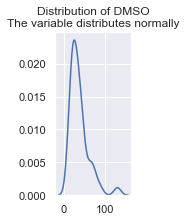

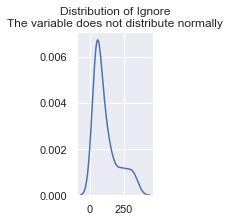

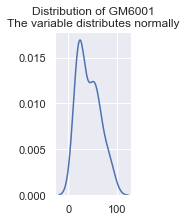

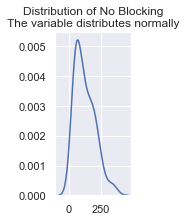

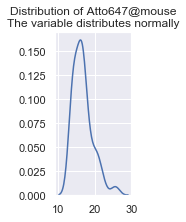

In [7]:
var="bg sub int under mask"
variable=var #change me

for cond in df2["Condition"].unique():
    dfcond=df2[df2["Condition"]==cond]
    x=dfcond[variable].values
    normdvar=(x-x.mean())/x.std()
    print(type(normdvar))

    import scipy.stats as ss
    [_,pval]=ss.kstest(normdvar,'norm')
    if pval<0.05:
        text="The variable does not distribute normally"
    else:
        text="The variable distributes normally"

    sns.set(font_scale=1)
    fig=plt.figure(figsize=(3,3))
    fig.add_subplot(121)
    sns.kdeplot(dfcond[variable],legend=False)
    plt.title('Distribution of ' + cond + '\n'+ text)

    

## kruskal wallis

In [11]:
df_pic=df2[df2["Blocked or not"]!="Unblocked"]
df_dmso=df_pic[df_pic["Condition"]=="DMSO"][var].dropna()
df_gm6001=df_pic[df_pic["Condition"]=="GM6001"][var].dropna()
df_atto=df_pic[df_pic["Condition"]=='Atto647@mouse'][var]

[stat, pval]=stats.kruskal(df_dmso,df_atto,df_gm6001)
print(pval)

2.6186076221731556e-12


In [16]:
df2["Condition"].unique()

array(['DMSO', 'Ignore', 'GM6001', 'No Blocking', 'Atto647@mouse'],
      dtype=object)

In [12]:
dfcheck=df_pic[df_pic["Condition"].isin(["DMSO", "GM6001", "Atto647@mouse"])]

## Dunn's corrected post hoc

In [34]:
import scikit_posthocs
scikit_posthocs.posthoc_dunn(dfcheck, val_col=var, group_col="Condition", p_adjust='bonferroni', sort=True)

,Atto647@mouse,DMSO,GM6001
Atto647@mouse,-1.000000,0.000027,0.070714
DMSO,0.000027,-1.000000,0.189824
GM6001,0.070714,0.189824,-1.000000


## ttests

In [11]:
df_pic=df2[df2["Blocked or not"]!="Unblocked"]
df_dmso=df_pic[df_pic["Condition"]=="DMSO"][var].dropna()
df_gm6001=df_pic[df_pic["Condition"]=="GM6001"][var].dropna()
df_atto=df_pic[df_pic["Condition"]=='Atto647@mouse'][var]
df_pfa=df_pic[df_pic["Condition"]=='PFA fixed'][var]
df_meth=df_pic[df_pic["Condition"]=='Methanol fixed'][var]
df_chabc=df_pic[df_pic["Condition"]=='chABC - treated'][var]
df_ubcontrol=df_pic[df_pic["Condition"]=="No Blocking"][var]



[stat, pval]=stats.ttest_ind(df_dmso,df_gm6001)

print(pval)

0.3544948848516236


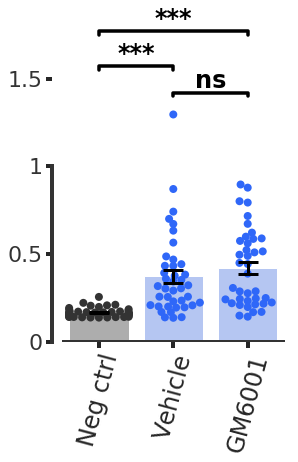

In [15]:
sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker

fig=plt.figure(figsize=(4,6))
df2plot=dfcheck#[df2["Blocked or not"]!="Unblocked"]
var="bg sub int under mask"
#var="ecm mean int norm2med"

order=['Atto647@mouse',
    'DMSO',
       'GM6001'
       ]

paletteswarm ={
               "Atto647@mouse":"#333333",
               "DMSO":"#2F67F8",
               "GM6001":"#2F67F8"
               }
palette ={
          "Atto647@mouse":"#adadad",
               "DMSO":"#abc2fc",
               "GM6001":"#abc2fc"
               }


g=sns.barplot(data=df2plot,y=var,x="Condition",
            order=order,palette=palette,ci=None)

g=sns.swarmplot(data=df2plot,y=var,x="Condition",
            order=order,palette=paletteswarm,size=8)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(g, .8)

plt.errorbar(x=np.arange(0,len(order)),
             y=[df2plot[df2plot["Condition"]==condtype][var].mean() for condtype in order],
             yerr=[df2plot[df2plot["Condition"]==condtype][var].sem() for condtype in order],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,
             capthick=3,zorder=10,
            alpha=1)

plt.axhline(0, color='#333333',alpha=1,linewidth=4)

g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)

plt.rcParams['font.sans-serif'] = 'Helvetica'


g.set_ylabel('')
g.set_xlabel('',color='#333333',alpha=.7)


g.grid(False)


for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)

plt.xticks(g.get_xticks(),['Neg ctrl','Vehicle','GM6001'],
           rotation=75,size=24)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=True,trim=trims,offset=offsets)
plt.yticks([0,50,100,150],fontsize=22,color='#333333')


scale_x=100
ticks_y=ticker.FuncFormatter(lambda x, pos: '{0:g}' .format(x/scale_x))
g=plt.gca()
g.yaxis.set_major_formatter(ticks_y)

#plt.ylim([0,12.5])
x1, x2 = 0,2
y= 175
h=2
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,size=24, weight='bold')

x1, x2 = 0,1
y= 155
h=2
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,size=24, weight='bold')

x1, x2 = 2,1
y= 140
h=2
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col,size=24, weight='bold')



diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"

fig.savefig(diri+'supp_ctrl_notpreexistingepitopes_gm6001_new.svg', bbox_inches='tight', format='svg')

In [34]:

dfcheck.to_csv("/Volumes/Macintosh HD/Users/taldankovich/Downloads/csvs/dfmeans.csv") 

## Number of images in each condition

In [14]:
for condition in df2plot["Condition"].unique():
    print(condition+' ' + str(len(df2plot[df2plot["Condition"]==condition])))

DMSO 40
Ignore 40
GM6001 40


## find representative pics

In [16]:
len(df_dmso)

40

In [9]:

df_pic=df2[df2["Blocked or not"]!="Unblocked"]
df_dmso=df_pic[df_pic["Condition"]=="DMSO"]
df_gm6001=df_pic[df_pic["Condition"]=="GM6001"]
df_atto=df_pic[df_pic["Condition"]=='Atto647@mouse']
df_pfa=df_pic[df_pic["Condition"]=='PFA fixed']
df_meth=df_pic[df_pic["Condition"]=='Methanol fixed']
df_chabc=df_pic[df_pic["Condition"]=='chABC - treated']
df_ubcontrol=df_pic[df_pic["Condition"]=="No Blocking"]

df_2show=df_atto
df_2show=df_2show.reset_index()

minval=0
maxval=10000
num=1
leng=len(df_2show)
fig=plt.figure(figsize=(20,150))
for i in range(0,len(df_2show)):
    #print(i)
    fig.add_subplot(leng,1,num)
    with ND2Reader(df_2show["filename"][i]) as images:
        ecm_image=images[0]
        plt.imshow(ecm_image,interpolation='none',cmap='hot',vmin=minval,vmax=maxval)
        plt.title(df_2show["filename"][i][-40:], size=14)
        plt.yticks(visible=False)
        plt.xticks(visible=False)
        plt.grid(visible=False)
        plt.axis(visible=False)
        #scalebar = ScaleBar(107.1, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
        #                       font_properties={'size':0,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
        #plt.gca().add_artist(scalebar)
        num+=1
    

<Figure size 1440x10800 with 0 Axes>